In [1]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
from glob import glob
import math
import cv2
from scipy import stats as s
import plotly as pt
import plotly.express as px


In [2]:
# Store name of Training videos in a Dataframe
f = open("train-data-names.txt", "r") # text file is opened in the mode read
temp = f.read()   # text file is read and stored in a variable temp
videos = temp.split('\n')

# creating a dataframe having video names
train = pd.DataFrame() # creating a dataframe
train['video_name'] = videos # storing videos in column name 'video_name'
train = train[:-1]
train_name = train['video_name']
train.head()


# Store name of TEST videos in a Dataframe
f = open("test-data-names.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]
test_name = test['video_name']
test.head()



# labelling the videos stored in dataframe


train_video_tag=[]
test_video_tag=[]

for i in range(train.shape[0]):
    train_video_tag.append(train['video_name'][i].split('_')[0].split(' ')[0])
train['tag'] = train_video_tag # storing tags in the column


for i in range(test.shape[0]):
    test_video_tag.append(test['video_name'][i].split('_')[0])
test['tag'] = test_video_tag  # storing tags in the column


In [181]:
train


,video_name,tag
0,gBR_sFM_c01_d04_mBR0_ch01.mp4,gBR
1,gBR_sFM_c01_d04_mBR1_ch02.mp4,gBR
2,gBR_sFM_c01_d04_mBR2_ch03.mp4,gBR
3,gBR_sFM_c01_d04_mBR4_ch05.mp4,gBR
4,gBR_sFM_c01_d04_mBR4_ch07.mp4,gBR
...,...,...
174,gWA_sFM_c01_d27_mWA1_ch16.mp4,gWA
175,gWA_sFM_c01_d27_mWA2_ch17.mp4,gWA
176,gWA_sFM_c01_d27_mWA2_ch21.mp4,gWA
177,gWA_sFM_c01_d27_mWA3_ch18.mp4,gWA


In [187]:
# data = px.data.gapminder()

data_train = train.groupby('tag')['tag'].count()
fig = px.bar(data_train, x='tag',labels={'index':'Labels', 'tag':'Count'},
             color='tag', height=400)
fig.show()

# Exploratory Data Analysis

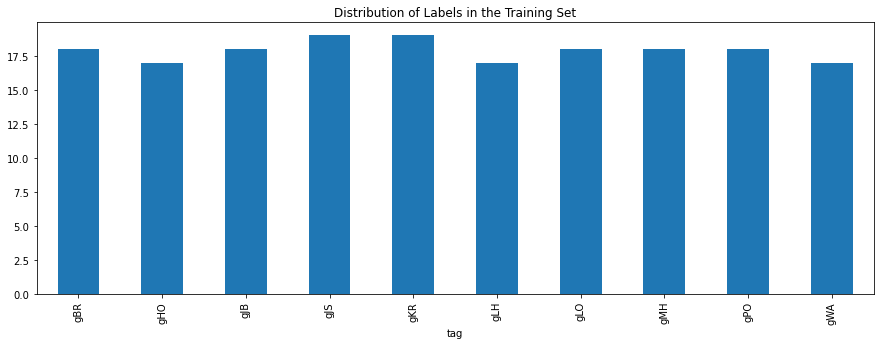

In [4]:
train.groupby('tag')['tag'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

img1 height1080
img1 width1920
img2 height1080
img2 width1920


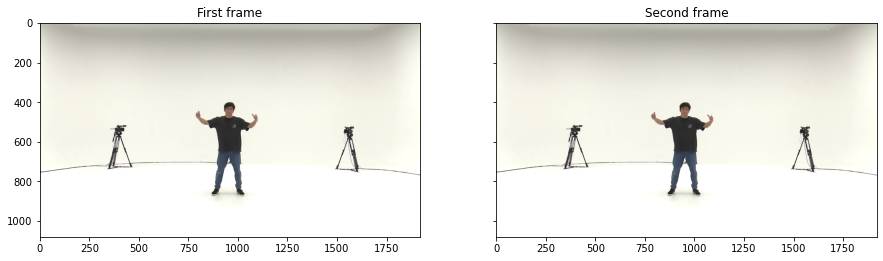

In [8]:
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)







SHOW_DEBUG_STEPS  = True

# Reading video 
cap = cv2.VideoCapture('C:/Users/Dhanshree/Desktop/Research Project/train-data/gBR_sFM_c01_d04_mBR0_ch01.mp4')

# if video is not present, show error
if not(cap.isOpened()):
    print("Error reading file")

# Check if you are able to capture the video    
ret, fFrame  = cap.read()

# Capturing 2 consecutive frames and making a copy of those frame. Perform all operations on the copy frame. 
ret, fFrame1 = cap.read()
ret, fFrame4 = cap.read()
img1 = fFrame1.copy()
img2 = fFrame4.copy()

if(SHOW_DEBUG_STEPS):
    print ('img1 height' + str(img1.shape[0]))
    print ('img1 width' + str(img1.shape[1]))
    print ('img2 height' + str(img2.shape[0]))
    print ('img2 width' + str(img2.shape[1]))

# Convert the colour images to greyscale in order to enable fast processing    
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#plotting
plot_image([img1, img2], cmap='gray', captions=["First frame", "Second frame"])

In [6]:
# Extracting frames from videos

for i in tqdm(range(train_name.shape[0])):
    count = 0
    videoFile = train_name[i]
    cap = cv2.VideoCapture('train-data/'+videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder 
            filename ='traindata-frames/' + videoFile +"_frame%d.jpg" % count;count+=1  # storing frames in the given path
            cv2.imwrite(filename, frame)
    cap.release()

# storing the frames from test videos
for i in tqdm(range(test_name.shape[0])):
    count = 0
    videoFile = test_name[i]
    cap = cv2.VideoCapture('test-data/'+videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            filename ='testdata-frame/' + videoFile +"_frame%d.jpg" % count;count+=1  # storing frames in the given path
            cv2.imwrite(filename, frame)
    cap.release()

100%|████████████████████████████████████████████████████████████████████████████████| 179/179 [53:09<00:00, 17.82s/it]


In [8]:
train
# gJB_sFM_c01_d08_mJB5_ch14.mp4_frame19   gBR_sFM_c01_d04_mBR0_ch01.mp4_frame12.jpg

,video_name,tag
0,gBR_sFM_c01_d04_mBR0_ch01.mp4,gBR
1,gBR_sFM_c01_d04_mBR1_ch02.mp4,gBR
2,gBR_sFM_c01_d04_mBR2_ch03.mp4,gBR
3,gBR_sFM_c01_d04_mBR4_ch05.mp4,gBR
4,gBR_sFM_c01_d04_mBR4_ch07.mp4,gBR
...,...,...
174,gWA_sFM_c01_d27_mWA1_ch16.mp4,gWA
175,gWA_sFM_c01_d27_mWA2_ch17.mp4,gWA
176,gWA_sFM_c01_d27_mWA2_ch21.mp4,gWA
177,gWA_sFM_c01_d27_mWA3_ch18.mp4,gWA


In [3]:
# getting the names of all the images
images = glob("traindata-frames/*.jpg")
train_image = []
train_class = []
for i in tqdm(range(len(images))):
    # creating the image name
    train_image.append(images[i].split('\\')[1])
    # creating the class of image
    train_class.append(images[i].split('_')[0].split('\\')[1])
    
# storing the images and their class in a dataframe
train_data = pd.DataFrame()  # creating a dataframe
train_data['image_name'] = train_image
train_data['class'] = train_class

# converting the dataframe into excel file 
train_data.to_excel('C:/Users/Dhanshree/Desktop/Research Project/new-frames.xlsx',header=True, index=False)

100%|██████████████████████████████████████████████████████████████████████████| 6638/6638 [00:00<00:00, 424851.45it/s]


# Training the Model

In [4]:
train_data = pd.read_excel('new-frames.xlsx') # fetching data from excel file
train_data.head()

,image_name,class
0,gBR_sFM_c01_d04_mBR0_ch01.mp4_frame0.jpg,gBR
1,gBR_sFM_c01_d04_mBR0_ch01.mp4_frame1.jpg,gBR
2,gBR_sFM_c01_d04_mBR0_ch01.mp4_frame10.jpg,gBR
3,gBR_sFM_c01_d04_mBR0_ch01.mp4_frame11.jpg,gBR
4,gBR_sFM_c01_d04_mBR0_ch01.mp4_frame12.jpg,gBR


In [5]:
from keras.preprocessing import image

# creating an empty list
train_image = []

# for loop to read and store frames
for i in tqdm(range(train_data.shape[0])):
    # loading the image and keeping the target size as (224,224,3) for reducing computational complexity
    img = image.load_img('traindata-frames/'+train_data['image_name'][i], target_size=(224,224,3))
    # converting it to array
    img1 = image.img_to_array(img)
    # normalizing the pixel value 
    img1 = img1/255
    # appending the image to the train_image list
    train_image.append(img1)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape


100%|██████████████████████████████████████████████████████████████████████████████| 6638/6638 [02:49<00:00, 39.14it/s]


(6638, 224, 224, 3)

# Creating Validation Set

In [7]:
# separating the target
y = train_data['class']                         

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [8]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [8]:
X_test

array([[[[0.7647059 , 0.7647059 , 0.73333335],
         [0.7490196 , 0.74509805, 0.7254902 ],
         [0.74509805, 0.74509805, 0.7137255 ],
         ...,
         [0.77254903, 0.77254903, 0.7411765 ],
         [0.7882353 , 0.7882353 , 0.75686276],
         [0.79607844, 0.79607844, 0.7647059 ]],

        [[0.77254903, 0.77254903, 0.7411765 ],
         [0.7647059 , 0.7607843 , 0.7411765 ],
         [0.7529412 , 0.7529412 , 0.72156864],
         ...,
         [0.78431374, 0.78431374, 0.7529412 ],
         [0.79607844, 0.79607844, 0.7647059 ],
         [0.8       , 0.8       , 0.76862746]],

        [[0.78039217, 0.78039217, 0.7490196 ],
         [0.77254903, 0.76862746, 0.7490196 ],
         [0.7647059 , 0.7647059 , 0.73333335],
         ...,
         [0.7882353 , 0.78431374, 0.7647059 ],
         [0.8       , 0.79607844, 0.7764706 ],
         [0.8156863 , 0.8156863 , 0.78431374]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

# Defining Architecture of Model

In [9]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

In [10]:
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

# extracting features for validation frames
X_test = base_model.predict(X_test)
X_test.shape

(1328, 7, 7, 512)

In [33]:
X_train.shape

(5310, 25088)

Fine-tuning the model

In [17]:
X_train = X_train.reshape(5310, 7*7*512)
X_test = X_test.reshape(1328, 7*7*512)

# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

In [190]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [113]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dense_66 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_67 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_48 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

# Training the model

In [191]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [192]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [144]:
# training the model
model.fit(X_train, y_train, epochs=18, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=35)

Epoch 1/18
152/152 [==============================] - 24s 158ms/step - loss: 2.2270 - accuracy: 0.1492 - val_loss: 1.7846 - val_accuracy: 0.2312
Epoch 2/18
152/152 [==============================] - 24s 156ms/step - loss: 1.6151 - accuracy: 0.3356 - val_loss: 1.0196 - val_accuracy: 0.6898
Epoch 3/18
152/152 [==============================] - 23s 154ms/step - loss: 1.0636 - accuracy: 0.5298 - val_loss: 0.7100 - val_accuracy: 0.6566
Epoch 4/18
152/152 [==============================] - 24s 157ms/step - loss: 0.8468 - accuracy: 0.6358 - val_loss: 0.3992 - val_accuracy: 0.8630
Epoch 5/18
152/152 [==============================] - 23s 149ms/step - loss: 0.7571 - accuracy: 0.6857 - val_loss: 0.4342 - val_accuracy: 0.8163
Epoch 6/18
152/152 [==============================] - 24s 158ms/step - loss: 0.7041 - accuracy: 0.7136 - val_loss: 0.3253 - val_accuracy: 0.8901
Epoch 7/18
152/152 [==============================] - 23s 154ms/step - loss: 0.7492 - accuracy: 0.6998 - val_loss: 0.3232 - val_ac

In [166]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=30)

Epoch 1/30
177/177 [==============================] - 26s 149ms/step - loss: 0.6177 - accuracy: 0.7763 - val_loss: 1.2102 - val_accuracy: 0.7229
Epoch 2/30
177/177 [==============================] - 27s 153ms/step - loss: 0.7739 - accuracy: 0.7175 - val_loss: 0.8871 - val_accuracy: 0.7425
Epoch 3/30
177/177 [==============================] - 27s 151ms/step - loss: 0.7120 - accuracy: 0.7473 - val_loss: 0.9330 - val_accuracy: 0.7538
Epoch 4/30
177/177 [==============================] - 30s 171ms/step - loss: 0.7234 - accuracy: 0.7424 - val_loss: 0.8892 - val_accuracy: 0.7575
Epoch 5/30
177/177 [==============================] - 28s 156ms/step - loss: 0.6818 - accuracy: 0.7561 - val_loss: 1.4030 - val_accuracy: 0.6092
Epoch 6/30
177/177 [==============================] - 26s 147ms/step - loss: 0.6502 - accuracy: 0.7691 - val_loss: 1.2240 - val_accuracy: 0.6491
Epoch 7/30
177/177 [==============================] - 26s 148ms/step - loss: 0.8803 - accuracy: 0.6840 - val_loss: 1.4573 - val_ac

In [167]:
history.history['loss']

[0.6177284121513367,
 0.773942768573761,
 0.7120285630226135,
 0.7233521938323975,
 0.6818053722381592,
 0.6502455472946167,
 0.8802919983863831,
 0.7631558775901794,
 0.7409849762916565,
 0.8474732637405396,
 0.9277089238166809,
 0.839927077293396,
 0.7676876187324524,
 0.7924802899360657,
 0.7788497805595398,
 0.8129113912582397,
 0.9725600481033325,
 0.9453372359275818,
 0.8851027488708496,
 0.7478353977203369,
 0.7880881428718567,
 0.7133437991142273,
 0.7483775019645691,
 1.1976407766342163,
 1.1243631839752197,
 1.4512863159179688,
 1.415728211402893,
 1.358274221420288,
 1.43658447265625,
 1.4653966426849365]

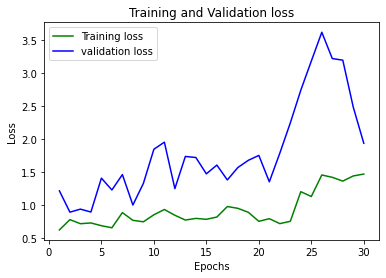

In [169]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



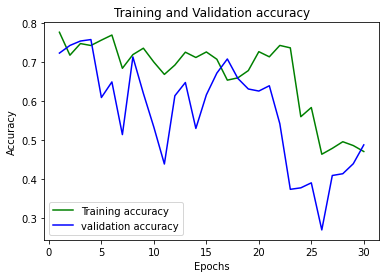

In [170]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluating model

In [172]:
base_model = VGG16(weights='imagenet', include_top=False)

In [173]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# loading the trained weights
model.load_weights('weight.hdf5')

# compiling the model
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [26]:
test

,video_name,tag
0,gBR_sFM_c01_d04_mBR3_ch04.mp4,gBR
1,gBR_sFM_c01_d05_mBR3_ch10.mp4,gBR
2,gBR_sFM_c01_d06_mBR3_ch17.mp4,gBR
3,gHO_sFM_c01_d19_mHO1_ch02.mp4,gHO
4,gHO_sFM_c01_d19_mHO3_ch04.mp4,gHO
5,gHO_sFM_c01_d20_mHO1_ch09.mp4,gHO
6,gHO_sFM_c01_d21_mHO3_ch21.mp4,gHO
7,gJB_sFM_c01_d07_mJB3_ch04.mp4,gJB
8,gJB_sFM_c01_d08_mJB1_ch09.mp4,gJB
9,gJB_sFM_c01_d08_mJB5_ch14.mp4,gJB


In [27]:
# # getting the test list
# f = open("test-data-names.txt", "r")
# temp = f.read()
# videos = temp.split('\n')
# videos

# # creating the dataframe
test1 = pd.DataFrame()
test1['video_name'] = videos
test1 = test1[:-1]
test_videos = test1['video_name']
test1.head()

#temp_test = pd.DataFrame()
#temp_test['video_name'] = test['video_name']
#temp_test.head()

,video_name
0,gBR_sFM_c01_d04_mBR3_ch04.mp4
1,gBR_sFM_c01_d05_mBR3_ch10.mp4
2,gBR_sFM_c01_d06_mBR3_ch17.mp4
3,gHO_sFM_c01_d19_mHO1_ch02.mp4
4,gHO_sFM_c01_d19_mHO3_ch04.mp4


In [28]:
# creating the tags
train = pd.read_excel('new-frames.xlsx')
y = train['class']
y = pd.get_dummies(y)

In [149]:
############ GOOD CODE ###################

# creating two lists to store predicted and actual tags
predict = []
actual = []
path = 'C:/Users/Dhanshree/Desktop/Research Project/test-data/'
# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    videoFile = test_videos[i]
    cap = cv2.VideoCapture('test-data/'+videoFile)
    count = 0
    counter = 0
    j = 0
    # removing all other files from the temp folder
    files = glob('temp/*')
    for f in files:
        os.remove(f)
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            #filename = 'frames/'+ str(j) + '_frame{:d}.jpg'.format(count)
            filename ='temp/' + "_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
            counter += 60 # i.e. at 30 fps, this advances one second
            j+= 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, counter)
        else:
            cap.release()
            break
# reading all the frames from temp folder
    images = glob("temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)
        
    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)
    # predicting tags for each array
    prediction = model.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual.append(videoFile.split('_')[0])


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [08:55<00:00, 18.47s/it]


In [150]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
print('The Accuracy for VGG-16 model is :',accuracy_score(predict, actual)*100)

75.86206896551724

In [176]:
from sklearn.metrics import f1_score
f1_score(actual, predict, average=None)

array([1.        , 0.        , 0.5       , 0.        , 1.        ,
       0.88888889, 1.        , 1.        , 0.8       , 1.        ])

In [152]:
from sklearn.metrics import precision_score
precision_score(actual, predict, average=None)

D:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1.        , 0.        , 0.33333333, 0.        , 1.        ,
       0.8       , 1.        , 1.        , 1.        , 1.        ])

In [153]:
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
#generating confusion matrix and classification report.



cf_matrix = confusion_matrix(actual, predict)



print(classification_report(actual, predict))

              precision    recall  f1-score   support

         gBR       1.00      1.00      1.00         3
         gHO       0.00      0.00      0.00         4
         gJB       0.33      1.00      0.50         3
         gJS       0.00      0.00      0.00         2
         gKR       1.00      1.00      1.00         2
         gLH       0.80      1.00      0.89         4
         gLO       1.00      1.00      1.00         3
         gMH       1.00      1.00      1.00         3
         gPO       1.00      0.67      0.80         3
         gWA       1.00      1.00      1.00         2

    accuracy                           0.76        29
   macro avg       0.71      0.77      0.72        29
weighted avg       0.70      0.76      0.71        29



D:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

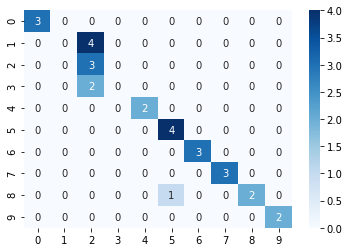

In [154]:
import seaborn as sns
sns.heatmap(confusion_matrix(actual, predict), annot = True, cmap='Blues', fmt='g')

<function matplotlib.pyplot.show(close=None, block=None)>

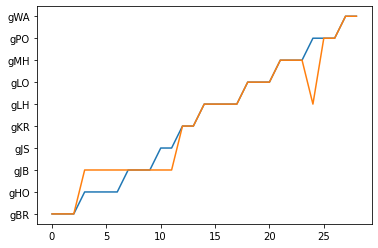

In [155]:
y1= actual
y2= predict
plt.plot(y1, label = "Actual")
plt.plot(y2, label = "Predicted")
plt.show

# VGG-19 Implementation

In [9]:
# creating the base model of pre-trained VGG16 model
VGG19_model = VGG19(weights='imagenet', include_top=False)

In [10]:
# extracting features for training frames
X_train_VGG19 = VGG19_model.predict(X_train)
X_train_VGG19.shape

# extracting features for validation frames
X_test_VGG19 = VGG19_model.predict(X_test)
X_test_VGG19.shape

(1328, 7, 7, 512)

In [11]:
X_train_VGG19 = X_train_VGG19.reshape(5310, 7*7*512)
X_test_VGG19 = X_test_VGG19.reshape(1328, 7*7*512)

# normalizing the pixel values
max = X_train_VGG19.max()
X_train_VGG19 = X_train_VGG19/max
X_test_VGG19 = X_test_VGG19/max

In [32]:
#defining the model architecture
model_VGG19 = Sequential()
model_VGG19.add(Dense(1024, activation='relu', input_shape=(25088,)))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(512, activation='relu'))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(256, activation='relu'))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(128, activation='relu'))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(10, activation='softmax'))

In [14]:
model_VGG19.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [33]:
# defining a function to save the weights of best model

from keras.callbacks import ModelCheckpoint
mcp_save_VGG19 = ModelCheckpoint('weight_VGG19.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [34]:
# compiling the model
model_VGG19.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history_VGG19 = model_VGG19.fit(X_train_VGG19, y_train, epochs=15, validation_data=(X_test_VGG19, y_test), callbacks=[mcp_save_VGG19], batch_size=30)

Epoch 1/15
177/177 [==============================] - 29s 163ms/step - loss: 2.1158 - accuracy: 0.1768 - val_loss: 1.7501 - val_accuracy: 0.2146
Epoch 2/15
177/177 [==============================] - 28s 158ms/step - loss: 1.5174 - accuracy: 0.3614 - val_loss: 0.9733 - val_accuracy: 0.6770
Epoch 3/15
177/177 [==============================] - 27s 153ms/step - loss: 1.1953 - accuracy: 0.4780 - val_loss: 0.7167 - val_accuracy: 0.7530
Epoch 4/15
177/177 [==============================] - 27s 153ms/step - loss: 1.0687 - accuracy: 0.5390 - val_loss: 0.6187 - val_accuracy: 0.8012
Epoch 5/15
177/177 [==============================] - 26s 147ms/step - loss: 1.0624 - accuracy: 0.5582 - val_loss: 0.6505 - val_accuracy: 0.7824
Epoch 6/15
177/177 [==============================] - 26s 148ms/step - loss: 0.9347 - accuracy: 0.6049 - val_loss: 0.9777 - val_accuracy: 0.5723
Epoch 7/15
177/177 [==============================] - 26s 149ms/step - loss: 0.8921 - accuracy: 0.6220 - val_loss: 1.0635 - val_ac

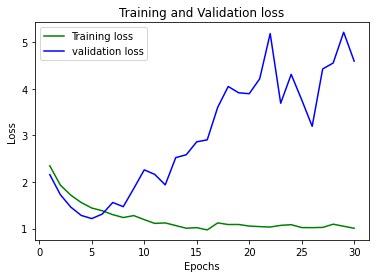

In [20]:

loss_train = history_VGG19.history['loss']
loss_val = history_VGG19.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


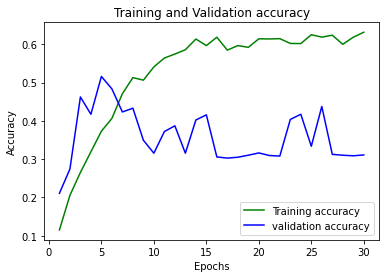

In [21]:
loss_train = history_VGG19.history['accuracy']
loss_val = history_VGG19.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluating VGG 19

In [37]:
# creating the base model of pre-trained VGG16 model
VGG19_model = VGG19(weights='imagenet', include_top=False)

In [38]:
#defining the model architecture
model_VGG19 = Sequential()
model_VGG19.add(Dense(1024, activation='relu', input_shape=(25088,)))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(512, activation='relu'))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(256, activation='relu'))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(128, activation='relu'))
model_VGG19.add(Dropout(0.5))
model_VGG19.add(Dense(10, activation='softmax'))


# loading the trained weights
model_VGG19.load_weights('weight_VGG19.hdf5')

# compiling the model
model_VGG19.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
############ GOOD CODE ###################

# creating two lists to store predicted and actual tags
predict_VGG19 = []
actual_VGG19 = []
path = 'C:/Users/Dhanshree/Desktop/Research Project/test-data/'
# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    videoFile = test_videos[i]
    cap = cv2.VideoCapture('test-data/'+videoFile)
    count = 0
    counter = 0
    j = 0
    # removing all other files from the temp folder
    files = glob('temp/*')
    for f in files:
        os.remove(f)
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            #filename = 'frames/'+ str(j) + '_frame{:d}.jpg'.format(count)
            filename ='temp/' + "_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
            counter += 60 # i.e. at 30 fps, this advances one second
            j+= 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, counter)
        else:
            cap.release()
            break
# reading all the frames from temp folder
    images = glob("temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)
        
    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    prediction_images = VGG19_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)
    # predicting tags for each array
    prediction = model_VGG19.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict_VGG19.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual_VGG19.append(videoFile.split('_')[0])


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [10:16<00:00, 21.27s/it]


In [40]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
print('The Accuracy for VGG-19 model is :',accuracy_score(predict_VGG19, actual_VGG19)*100)

The Accuracy for VGG-19 model is : 68.96551724137932


<function matplotlib.pyplot.show(close=None, block=None)>

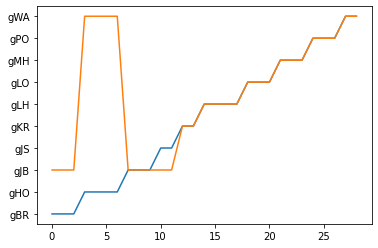

In [41]:
y3= actual_VGG19
y4= predict_VGG19
plt.plot(y3, label = "Actual")
plt.plot(y4, label = "Predicted")
plt.show

<AxesSubplot:>

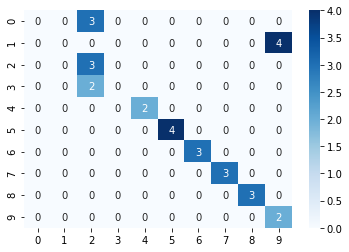

In [44]:
import seaborn as sns
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(actual_VGG19, predict_VGG19), annot = True, cmap='Blues', fmt='g')

# CNN

In [64]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [31]:

# We will use a Sequential model for model construction
model_cnn = Sequential()

# Defining The Model Architecture
model_cnn.add(Conv2D(filters = 224, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model_cnn.add(Conv2D(filters = 224, kernel_size = (3, 3), activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))
model_cnn.add(GlobalAveragePooling2D())
model_cnn.add(Dense(256, activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(10, activation = 'softmax'))

# Printing the models summary
model_cnn.summary()
    
print("Model Created Successfully!")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 224)     6272      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 224)     451808    
_________________________________________________________________
batch_normalization_5 (Batch (None, 220, 220, 224)     896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 224)     0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 224)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               57600     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)              

In [67]:
model_cnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [194]:
history_cnn = model_cnn.fit(X_train, y_train, epochs=18, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=35)

Epoch 1/18
152/152 [==============================] - 24s 157ms/step - loss: 1.7614 - accuracy: 0.2603 - val_loss: 1.3998 - val_accuracy: 0.4059
Epoch 2/18
152/152 [==============================] - 24s 158ms/step - loss: 1.4142 - accuracy: 0.3889 - val_loss: 0.8660 - val_accuracy: 0.6017
Epoch 3/18
152/152 [==============================] - 23s 153ms/step - loss: 1.2126 - accuracy: 0.4578 - val_loss: 0.9198 - val_accuracy: 0.6002
Epoch 4/18
152/152 [==============================] - 24s 159ms/step - loss: 1.1861 - accuracy: 0.4736 - val_loss: 0.7453 - val_accuracy: 0.7831
Epoch 5/18
152/152 [==============================] - 25s 161ms/step - loss: 1.1117 - accuracy: 0.5098 - val_loss: 0.6842 - val_accuracy: 0.7327
Epoch 6/18
152/152 [==============================] - 23s 149ms/step - loss: 1.0585 - accuracy: 0.5330 - val_loss: 0.7127 - val_accuracy: 0.6679
Epoch 7/18
152/152 [==============================] - 24s 156ms/step - loss: 0.9631 - accuracy: 0.5821 - val_loss: 0.6871 - val_ac

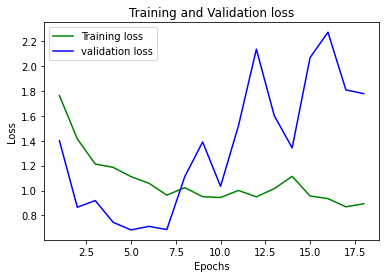

In [198]:
loss_train = history_cnn.history['loss']
loss_val = history_cnn.history['val_loss']
epochs = range(1,19)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

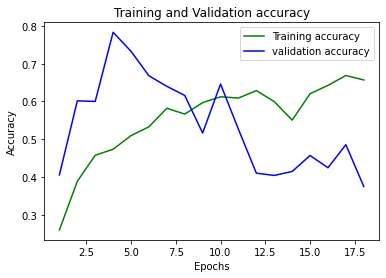

In [199]:
loss_train = history_cnn.history['accuracy']
loss_val = history_cnn.history['val_accuracy']
epochs = range(1,19)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [200]:
# creating two lists to store predicted and actual tags
predict_cnn = []
actual_cnn = []
path = 'C:/Users/Dhanshree/Desktop/Research Project/test-data/'
# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    videoFile = test_videos[i]
    cap = cv2.VideoCapture('test-data/'+videoFile)
    count = 0
    counter = 0
    j = 0
    # removing all other files from the temp folder
    files = glob('temp/*')
    for f in files:
        os.remove(f)
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            #filename = 'frames/'+ str(j) + '_frame{:d}.jpg'.format(count)
            filename ='temp/' + "_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
            counter += 60 # i.e. at 30 fps, this advances one second
            j+= 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, counter)
        else:
            cap.release()
            break
# reading all the frames from temp folder
    images = glob("temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)
        
    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)
    # predicting tags for each array
    prediction = model_cnn.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict_cnn.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual_cnn.append(videoFile.split('_')[0])


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [10:03<00:00, 20.81s/it]


In [201]:
print('The Accuracy for CNN model is :',accuracy_score(predict_cnn, actual_cnn)*100)

The Accuracy for CNN model is : 27.586206896551722


<AxesSubplot:>

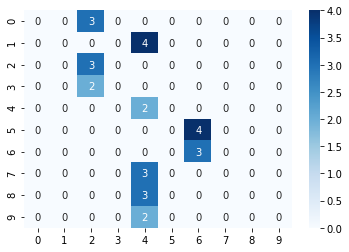

In [202]:
sns.heatmap(confusion_matrix(actual_cnn, predict_cnn), annot = True, cmap='Blues', fmt='g')